# Create visualizations and geotiffs for fire multi-disturbances

In [1]:
import os
import earthpy as et
from os import path
import earthpy.plot as ep
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import rioxarray as rxr
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
from tqdm import tqdm
import gc

home = path.join(et.io.HOME, "GitHub", "visualize-forest-disturbance")

forest_folder = path.join(home, "forest-disturbance-stack", "western-conus")

In [2]:
# fire_sum_path = path.join(home, "fire_stack.tif")
# with rio.open(fire_sum_path) as src:
#     print(src.dtypes)
# fire_sum = rxr.open_rasterio(fire_sum_path, masked=True).squeeze()
# fire_int = fire_sum.astype(np.int8)
fire_int_path = path.join(home, 'fire_stack.tif')
# fire_int.rio.to_raster(fire_int_path, dtype=np.int8)
with rio.open(fire_int_path) as src:
    print(src.dtypes)

('uint8',)


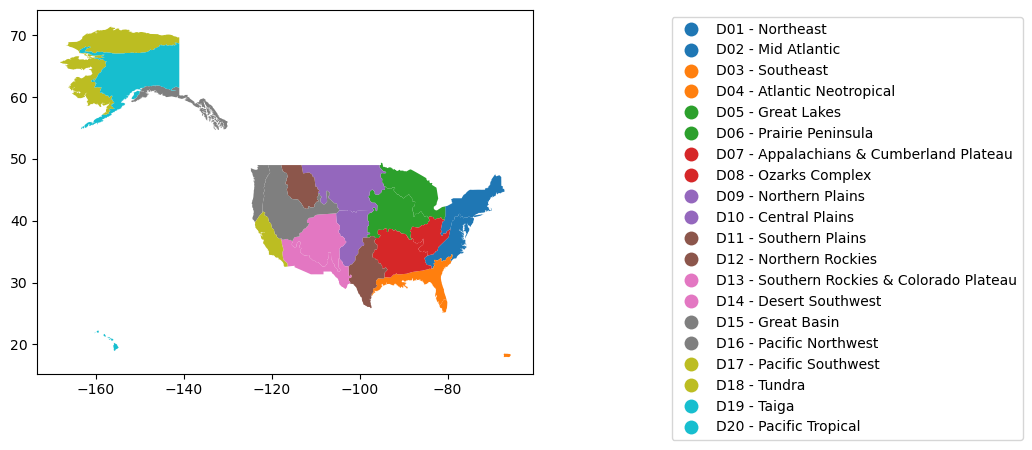

In [3]:
neon_domains = gpd.read_file(path.join(home, "neon-domains", "Polygons-polygon.shp"))
fig, ax = plt.subplots()
neon_domains.plot(column="Name", legend=True, ax=ax)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1))

<Axes: >

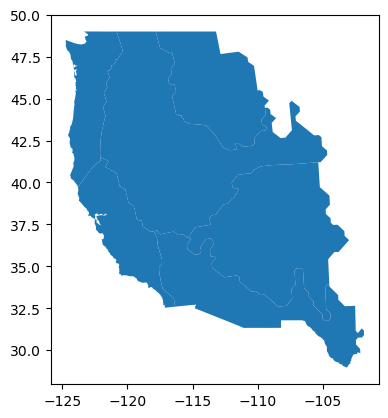

In [4]:
western_forests_domains = ['D12 - Northern Rockies', 
                           'D13 - Southern Rockies & Colorado Plateau', 
                           'D14 - Desert Southwest',
                           'D15 - Great Basin', 
                           'D16 - Pacific Northwest', 
                           'D17 - Pacific Southwest']

western_neon = neon_domains[neon_domains['Name'].isin(western_forests_domains)].clip([-130, 28.97026262, -101.84943552, 50])

western_neon.plot()

In [5]:
with rio.open(fire_int_path) as src:
    fire_crs = src.crs
    fire_array = src.read(1)
    fire_extent = plotting_extent(src)
    fire_meta = src.profile
    fire_transofrm = src.transform
    
fire_array[fire_array == 255] = 0

western_neon_reproj = western_neon.to_crs(fire_crs)

In [6]:
YlOrRd = mpl.colormaps['YlOrRd'].resampled(7)
newcolors = YlOrRd(np.linspace(0, 1, 7)) 
white = np.array([0, 0, 0, 0])
newcolors[:1, :] = white
groups = ["0", "1", "2", "3", "4", "5", "6+"]
classes=[0, 1, 2, 3, 4, 5, 6]
newcmp = ListedColormap(newcolors)

In [7]:
gc.collect()

60

In [8]:
YlOrRd_fso1 = mpl.colormaps['YlOrRd'].resampled(2)
newcolors_fso1 = YlOrRd_fso1(np.linspace(0, 1, 2))
white = np.array([0, 0, 0, 0])
newcolors_fso1[:1, :] = white
groups_fso1 = ["Fire not present", "Fire present"]
classes_fso1=[0, 1]
newcmp_fso1 = ListedColormap(newcolors_fso1)
fire_sum_over_1 = fire_array.copy()
fire_sum_over_1[fire_sum_over_1 > 0] = 1

In [9]:
fire_sum_over_1_area = (fire_sum_over_1.sum() * 30 * 30)/1000000
print("Total area that experienced one fire: {} sq km".format(fire_sum_over_1_area))

Total area that experienced one fire: 152583.1731 sq km


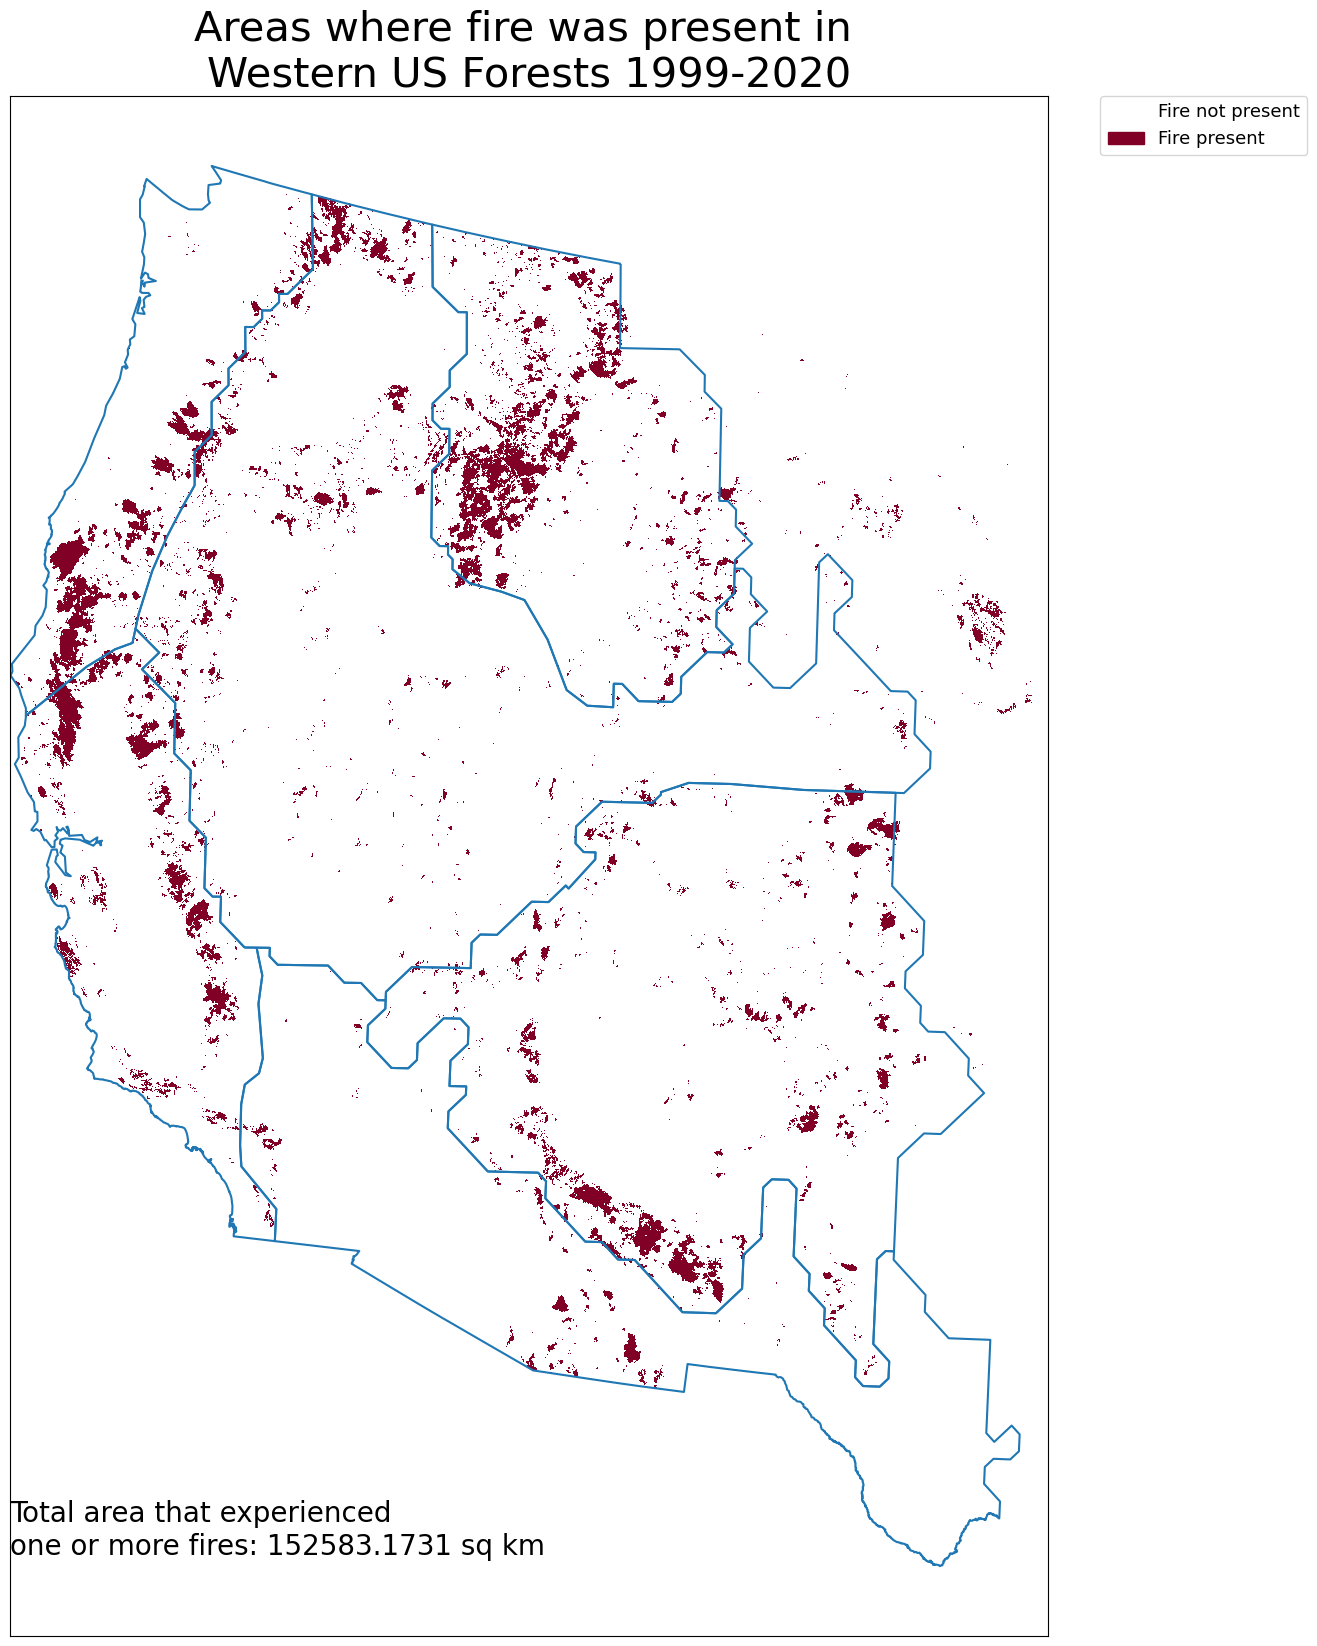

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(fire_sum_over_1,
              ax=ax,
              extent=fire_extent, 
              cmap=newcmp_fso1, 
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso1)

ax.annotate("Total area that experienced \none or more fires: {} sq km".format(fire_sum_over_1_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)

ax.set_title(label="Areas where fire was present in \nWestern US Forests 1999-2020", size=30)

western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areawith1fire.png"))
plt.show()

In [11]:
fire_sum_over_2 = fire_array.copy()
fire_sum_over_2[fire_sum_over_2 <= 1] = 0
fire_sum_over_2[fire_sum_over_2 > 1] = 1
groups_fso2 = ["Less than 2 fires present", "2 or more fires present"]

In [12]:
fire_sum_over_2_area = (fire_sum_over_2.sum() * 30 * 30)/1000000
print("Total area that experienced two or more fires: {} sq km".format(fire_sum_over_2_area))

Total area that experienced two or more fires: 23521.7916 sq km


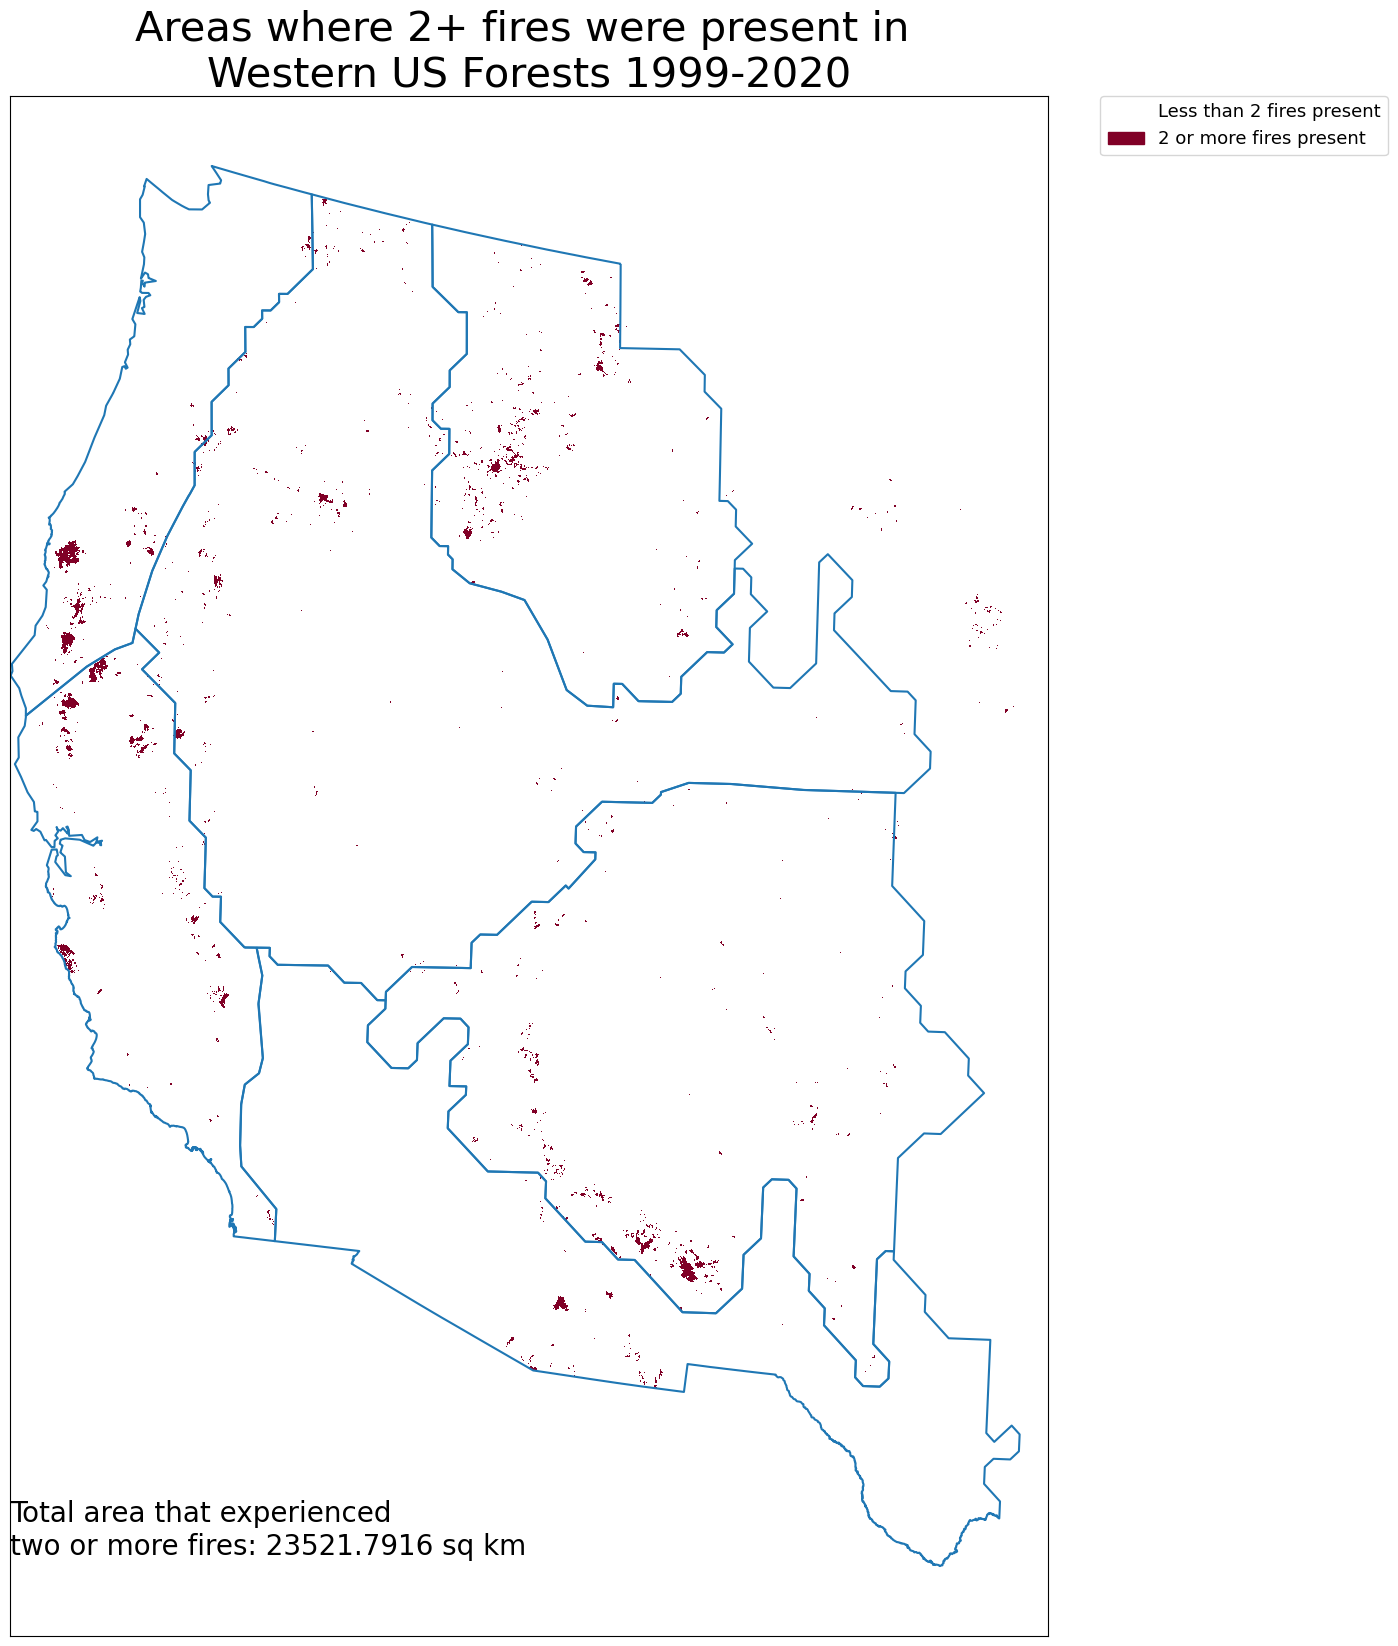

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(fire_sum_over_2,
              ax=ax,
              extent=fire_extent, 
              cmap=newcmp_fso1,
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso2)

ax.annotate("Total area that experienced \ntwo or more fires: {} sq km".format(fire_sum_over_2_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)

ax.set_title(label="Areas where 2+ fires were present in \nWestern US Forests 1999-2020", size=30)

western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areaswith2fires.png"))
plt.show()

In [14]:
fire_sum_over_3 = fire_array.copy()
fire_sum_over_3[fire_sum_over_3 <= 2] = 0
fire_sum_over_3[fire_sum_over_3 > 2] = 1
groups_fso3 = ["Less than 3 fires present", "3 or more fires present"]

In [15]:
fire_sum_over_3_area = (fire_sum_over_3.sum() * 30 * 30)/1000000
print("Total area that experienced two or more fires: {} sq km".format(fire_sum_over_3_area))

Total area that experienced two or more fires: 3203.0541 sq km


In [16]:
gc.collect()

2539

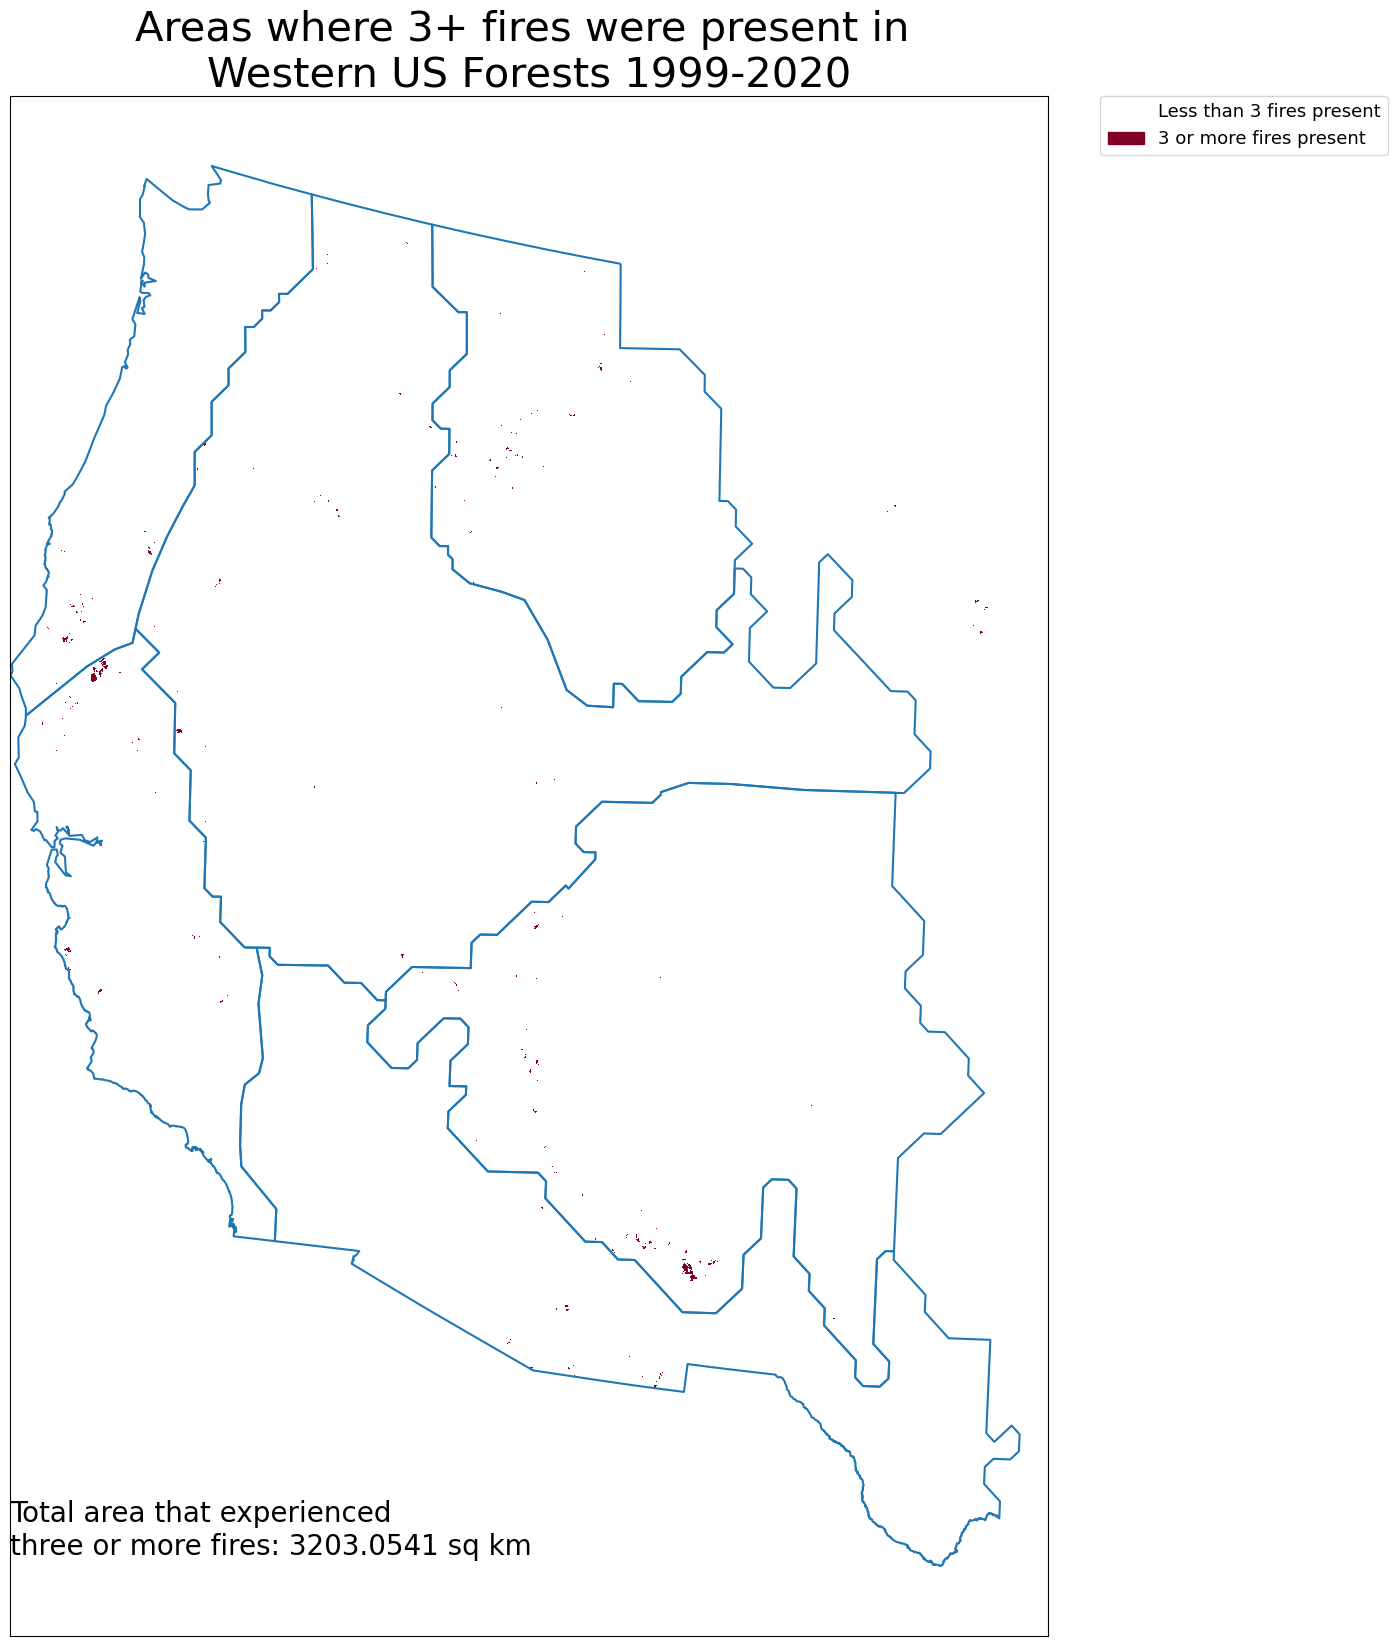

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))

ep.plot_bands(fire_sum_over_3,
              ax=ax,
              extent=fire_extent, 
              cmap=newcmp_fso1,
              cbar=False,
              scale=False)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes_fso1,
               titles=groups_fso3)

ax.set_title(label="Areas where 3+ fires were present in \nWestern US Forests 1999-2020", size=30)

ax.annotate("Total area that experienced \nthree or more fires: {} sq km".format(fire_sum_over_3_area), xy=(-2356125.0, 701815.0), xycoords='data', size=20)


western_neon_reproj.boundary.plot(ax=ax)

plt.savefig(os.path.join(home, "areaswith3fires.png"))
plt.show()

In [18]:
with rio.open('fire_sum_over1.tif', 'w', **fire_meta) as dst:
    dst.write(fire_sum_over_1, 1)
with rio.open('fire_sum_over2.tif', 'w', **fire_meta) as dst:
    dst.write(fire_sum_over_2, 1)
with rio.open('fire_sum_over3.tif', 'w', **fire_meta) as dst:
    dst.write(fire_sum_over_3, 1)